In [1]:
# Supress Warnings 
import warnings
warnings.filterwarnings('ignore')

# Import common GIS tools
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import rioxarray as rio
import rasterio
from matplotlib.cm import jet, RdYlGn
import geopandas as gpd
from shapely import wkt

# Import Planetary Computer tools
import stackstac
import pystac_client
import planetary_computer 
from odc.stac import stac_load

In [2]:
building = pd.read_csv("Building_Footprints_20250129.csv")

# Display the first few rows
building.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Building_Footprints_20250129.csv'

In [51]:
building['the_geom'] = building['the_geom'].apply(wkt.loads)
gdf_build = gpd.GeoDataFrame(building, geometry="the_geom", crs="EPSG:4326")
type(gdf_build)

geopandas.geodataframe.GeoDataFrame

In [72]:
gdf_build

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,"MULTIPOLYGON (((-73.96665 40.626, -73.96685 40...",NaN,3170958.0,1925.0,08/22/2017,Constructed,96807,29.749853,2100,40.0,0,0,3.065220e+09,3.065220e+09,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,"MULTIPOLYGON (((-74.1679 40.63936, -74.1679 40...",NaN,5028452.0,1965.0,08/22/2017,Constructed,326368,22.630000,2100,39.0,0,0,5.012640e+09,5.012640e+09,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,"MULTIPOLYGON (((-74.19511 40.55611, -74.1952 4...",NaN,5078368.0,1970.0,08/22/2017,Constructed,746627,35.760000,2100,51.0,0,0,5.060190e+09,5.060190e+09,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,"MULTIPOLYGON (((-73.96113 40.57744, -73.96115 ...",NaN,3245111.0,1928.0,08/22/2017,Constructed,786626,37.500000,2100,6.0,0,0,3.086910e+09,3.086910e+09,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,"MULTIPOLYGON (((-73.75422 40.75591, -73.75417 ...",NaN,4161096.0,1950.0,08/22/2017,Constructed,746409,18.015113,2100,93.0,0,0,4.075020e+09,4.075020e+09,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082891,"MULTIPOLYGON (((-74.21295 40.55038, -74.21282 ...",NaN,5117215.0,1980.0,01/22/2019,Constructed,231710,28.000000,2100,58.0,0,0,5.070550e+09,5.070558e+09,Other (Man,{D7E8EFEB-B5FE-4947-91FE-3C64D7A765F6}
1082892,"MULTIPOLYGON (((-74.07144 40.60374, -74.07144 ...",NaN,5095843.0,1977.0,01/22/2019,Constructed,592083,34.000000,2100,120.0,0,0,5.030240e+09,5.030248e+09,Other (Man,{CB047362-8CBA-445D-A6F0-47EDBA7B1022}
1082893,"MULTIPOLYGON (((-74.07205 40.60442, -74.0721 4...",NaN,5121909.0,1977.0,01/22/2019,Constructed,6864,32.000000,2100,137.0,0,0,5.030240e+09,5.030248e+09,Other (Man,{A6A1233E-65EC-4182-8E32-FF6F5DBE0E9E}
1082894,"MULTIPOLYGON (((-74.0715 40.603, -74.07156 40....",NaN,5121800.0,1977.0,01/22/2019,Constructed,853269,31.000000,2100,116.0,0,0,5.030240e+09,5.030248e+09,Other (Man,{002F795F-12AD-4CD9-8503-FEFD03E008A5}


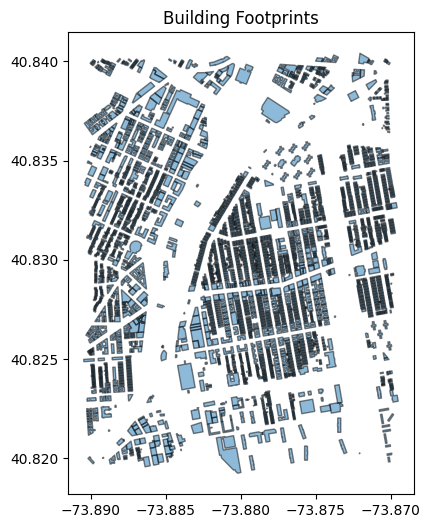

In [86]:
gdf_clipped = gdf_build.cx[-73.89:-73.87, 40.82:40.84]
gdf_clipped.plot(figsize=(6, 6), edgecolor="black", alpha=0.5)
plt.title("Building Footprints")
plt.show()

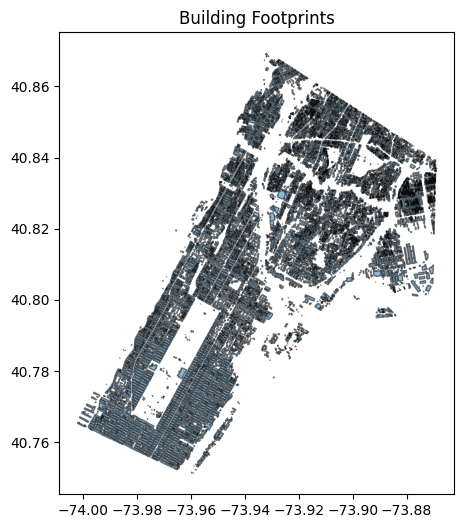

In [43]:
gdf = gpd.read_file("Building_Footprint.kml", driver="KML")
gdf.plot(figsize=(6, 6), edgecolor="black", alpha=0.5)
plt.title("Building Footprints")
plt.show()

In [61]:
gdb_path = "nyclion_24d/lion/lion.gdb"
table_name = "a0000000a"  # Name of the table you want to read

# Read the table from the Geodatabase
gdf = gpd.read_file(f"{gdb_path}/{table_name}.gdbtable")

# Display the first few rows
gdf.head()

,OBJECTID,NODEID,GLOBALID,VIntersect,geometry
0,1,1,{35DEE984-625C-4EB7-8A75-39AF86611792},,POINT (912935.681 119003.593)
1,2,2,{430B64C5-B8FD-412E-A05C-956F004DC6B5},,POINT (913801.147 116956.84)
2,3,3,{C50A1D48-67BE-4DA1-9FE0-790C25CEF77A},,POINT (912287.069 120468.607)
3,4,4,{4DA305AD-BFAD-4611-9699-7C9125ED3963},,POINT (912292.075 122532.32)
4,5,5,{4F821377-CB31-47D9-B776-BC4B0C3869F6},,POINT (912366.475 124500.249)


In [62]:
gdf = gpd.read_file(f"{gdb_path}/a0000000b.gdbtable")

# Display the first few rows
gdf.head()

,NodeId,StreetName
0,1,NY-NJ BOUNDARY
1,1,2010 CB BOUNDARY
2,2,NY-NJ BOUNDARY
3,3,NY-NJ BOUNDARY
4,4,NY-NJ BOUNDARY


In [63]:
gdf = gpd.read_file(f"{gdb_path}/a0000000c.gdbtable")

# Display the first few rows
gdf.head()

,PDir,PType,SName,SType,SDir,Street,Join_ID
0,E,None,168,ST,None,EAST 168 STREET,2251001000000
1,W,None,192,ST,None,WEST 192 STREET,2798401000000
2,None,None,UNION,AVE,None,UNION AVENUE,2728001000000
3,None,None,UNION,AVE,None,UNION AVENUE,21279502000000X
4,None,None,UNION,AVE,None,UNION AVENUE,21279503000000X


In [65]:
gdf = gpd.read_file(f"{gdb_path}/a0000000d.gdbtable")

# Display the first few rows
for col in gdf.columns:
    print(col)

Street
SAFStreetName
FeatureTyp
SegmentTyp
IncExFlag
RB_Layer
NonPed
TrafDir
TrafSrc
SpecAddr
FaceCode
SeqNum
StreetCode
SAFStreetCode
LGC1
LGC2
LGC3
LGC4
LGC5
LGC6
LGC7
LGC8
LGC9
BOE_LGC
SegmentID
SegCount
LocStatus
LZip
RZip
LBoro
RBoro
L_CD
R_CD
LATOMICPOLYGON
RATOMICPOLYGON
LCT2020
LCT2020Suf
RCT2020
RCT2020Suf
LCB2020
LCB2020Suf
RCB2020
RCB2020Suf
LCT2010
LCT2010Suf
RCT2010
RCT2010Suf
LCB2010
LCB2010Suf
RCB2010
RCB2010Suf
LCT2000
LCT2000Suf
RCT2000
RCT2000Suf
LCB2000
LCB2000Suf
RCB2000
RCB2000Suf
LCT1990
LCT1990Suf
RCT1990
RCT1990Suf
LAssmDist
LElectDist
RAssmDist
RElectDist
SplitElect
LSchlDist
RSchlDist
SplitSchl
LSubSect
RSubSect
SanDistInd
MapFrom
MapTo
BoroBndry
MH_RI_Flag
XFrom
YFrom
XTo
YTo
ArcCenterX
ArcCenterY
CurveFlag
Radius
NodeIDFrom
NodeIDTo
NodeLevelF
NodeLevelT
ConParity
Twisted
RW_TYPE
PhysicalID
GenericID
NYPDID
FDNYID
LBlockFaceID
RBlockFaceID
LegacyID
Status
StreetWidth_Min
StreetWidth_Max
StreetWidth_Irr
BikeLane
BIKE_TRAFDIR
ACTIVE_FLAG
POSTED_SPEED
Snow_Prio

In [79]:
from pyproj import Transformer
from shapely.ops import transform

transformer = Transformer.from_crs("EPSG:2263", "EPSG:4326", always_xy=True)

def transform_geometry(geometry):
    return transform(lambda x, y: transformer.transform(x, y), geometry)

gdf['geometry'] = gdf['geometry'].apply(transform_geometry)

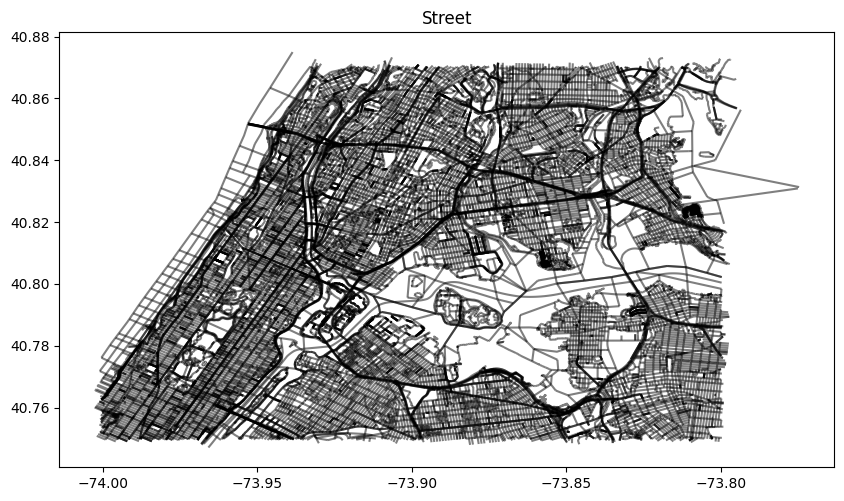

In [81]:
gdf_street = gdf.cx[-74:-73.8, 40.75:40.87]
gdf_street.plot(figsize=(10, 10), edgecolor="black", alpha=0.5)
plt.title("Street")
plt.show()

In [92]:
(gdf['StreetWidth_Max'] - gdf['StreetWidth_Min']).describe()

count    172909.000000
mean          3.516879
std           8.241092
min         -35.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         257.000000
dtype: float64

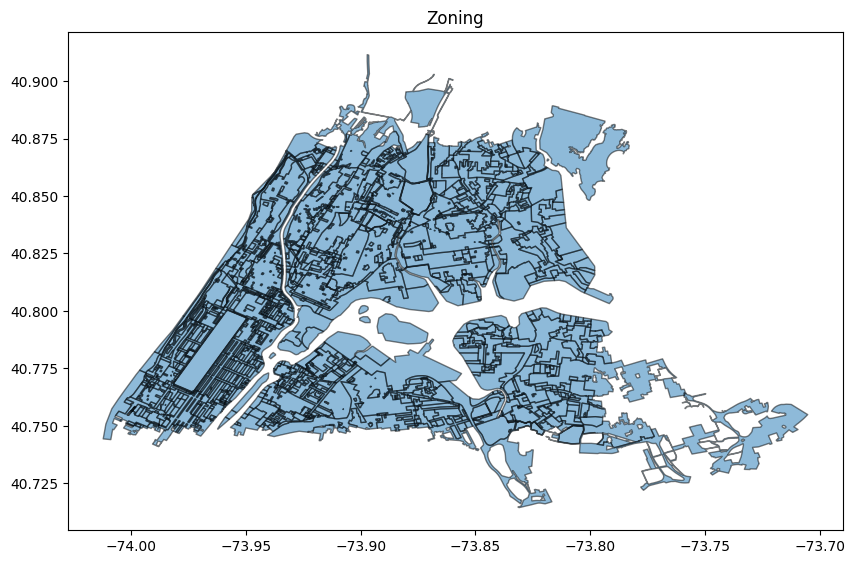

In [ ]:
gdf = gpd.read_file(r'nycgiszoningfeatures/nycgiszoningfeatures_202411shp/nyzd.shp')
gdf['geometry'] = gdf['geometry'].apply(transform_geometry)

gdf_zoning = gdf.cx[-74:-73.8, 40.75:40.87]
gdf_zoning.plot(figsize=(10, 10), edgecolor="black", alpha=0.5)
plt.title("Zoning")
plt.show()

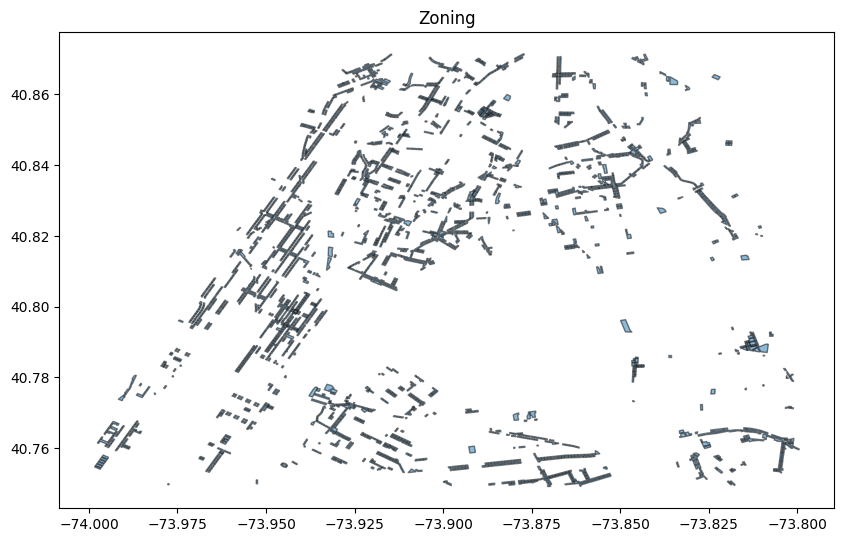

In [108]:
gdf = gpd.read_file(r'nycgiszoningfeatures/nycgiszoningfeatures_202411shp/nyco.shp')
gdf['geometry'] = gdf['geometry'].apply(transform_geometry)

gdf_zoning = gdf.cx[-74:-73.8, 40.75:40.87]
gdf_zoning.plot(figsize=(10, 10), edgecolor="black", alpha=0.5)
plt.title("Zoning")
plt.show()

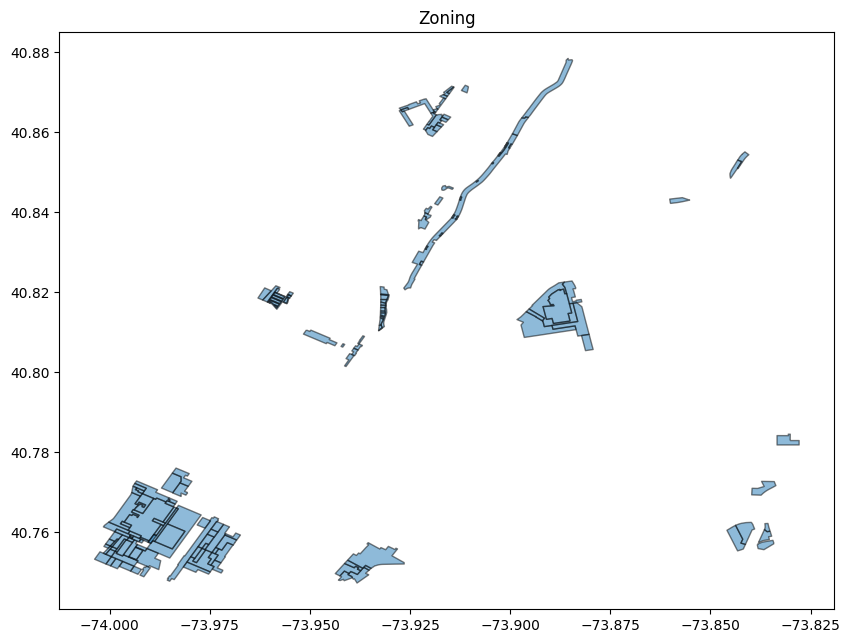

In [112]:
gdf = gpd.read_file(r'nycgiszoningfeatures/nycgiszoningfeatures_202411shp/nysp_sd.shp')
gdf['geometry'] = gdf['geometry'].apply(transform_geometry)

gdf_zoning = gdf.cx[-74:-73.8, 40.75:40.87]
gdf_zoning.plot(figsize=(10, 10), edgecolor="black", alpha=0.5)
plt.title("Zoning")
plt.show()